### 스타벅스 매장 입지 분석
- 순서
    - [x] 데이터 수집
    - [x] 데이터 전처리(다시)
    - [x] 분석
    - [x] 시각화

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00


In [3]:
!pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 751.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.4 kB ? eta -:--:--
   ---------------------------------------- 78.4/78.4 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install openpyxl

In [47]:
# 분석, 시각화 라이브러리 사용
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rc, font_manager
import warnings
import seaborn as sns
import time
from tqdm import tqdm  # 반복 진행 프로그레스바 모듈

In [48]:
# 맷플롯립 한글 및 기타설정
## 맑은 고딕
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name() # Malgun Gothic
warnings.simplefilter('ignore') # 경고메시지 출력숨김

## 맷플롯립 설정
plt.rcParams['font.family'] = font_name # 폰트 설정
plt.rcParams['font.size'] = 12 # 글자크기
plt.rcParams['figure.figsize'] = (12, 6) # (W, H)
plt.rcParams['axes.grid'] = True # 차트 가로세로줄 표시
plt.rcParams['axes.unicode_minus'] = False # 한글설정 후 마이너스깨짐 방지

## 시본 설정
sns.set_theme(font=font_name, style='darkgrid', rc={'axes.unicode_minus':False})

#### 데이터 전처리
- 데이터 로드 후, 확인, 결측치나 이상치를 제거

In [7]:
## 스타벅스 서울매장정보
df_seoul_starbuck = pd.read_csv('./data/스타벅스_서울매장정보_최종.csv', index_col=0)
df_seoul_starbuck.tail()

,매장코드,매장명,매장종류,주소,위도,경도
609,838,사가정역,general,서울특별시 중랑구 면목로 310,37.579594,127.087966
610,493,상봉역,general,서울특별시 중랑구 망우로 307 (상봉동),37.596890,127.086470
611,1668,묵동,general,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",37.615368,127.076633
612,2002,양원역,general,서울특별시 중랑구 양원역로10길 3 (망우동),37.606654,127.106360
613,1749,중화역,general,서울특별시 중랑구 봉화산로 35 1층,37.601709,127.078411


In [8]:
## 서울구별 위치 정보
df_seoul_municipality = pd.read_csv('./data/서울구별위치.csv', index_col=0)
df_seoul_municipality.tail()

,docity,do,city,longitude,latitude
20,서울용산구,서울,용산구,126.967522,37.536094
21,서울은평구,서울,은평구,126.931242,37.599969
22,서울종로구,서울,종로구,126.981642,37.570378
23,서울중구,서울,중구,126.999642,37.561003
24,서울중랑구,서울,중랑구,127.094778,37.603806


- 데이터 확인

In [9]:
## 결측치 확인(값이 빠져있는 것)
df_seoul_starbuck.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매장코드    614 non-null    int64  
 1   매장명     614 non-null    object 
 2   매장종류    614 non-null    object 
 3   주소      614 non-null    object 
 4   위도      614 non-null    float64
 5   경도      614 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 33.6+ KB


#### 서울 행정구역 경계지도 Geojson(Geometry json 파일) 지도표시
- https://github.com/southkorea/seoul-maps

- 윈도우 Powershell로 다운로드
    - 터미널 > 새터미널로 오픈
    - day03/data로 이동 후
    - wget -Uri https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json

- 깃허브 다운로드

### 데이터 전처리 계속

In [14]:
## 스타벅스 서울매장 정보확인
df_seoul_starbuck.head()

,매장코드,매장명,매장종류,주소,위도,경도
0,1509,역삼아레나빌딩,general,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,1434,논현역사거리,general,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,1595,신사역성일빌딩,general,서울특별시 강남구 강남대로 584 (논현동),37.513931,127.020606
3,1527,국기원사거리,general,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,1468,대치재경빌딩,general,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583


In [17]:
## 주소에서 '강남구' 따로 분리해서 새로운 컬럼을 생성
guList = []

for address in tqdm(df_seoul_starbuck['주소']):
    tmp_addr = address.split(' ')
    print(tmp_addr[1])  # tmp_addr[1] 구별 이름
    guList.append(tmp_addr[1])

100%|██████████| 614/614 [00:00<00:00, 204876.90it/s]

강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강북구
강북구
강북구
강북구
강북구
강북구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
금천구
금천구
금천구
금천구
금천구
금천구
금천구
금천구
금천구
금천구
금천구
금천구
금천구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문

In [18]:
len(guList)

614

In [20]:
## guList를 df_seoul_starbuck에 마지막 컬럼으로 추가
df_seoul_starbuck['구'] = guList

In [21]:
df_seoul_starbuck.tail()

,매장코드,매장명,매장종류,주소,위도,경도,구
609,838,사가정역,general,서울특별시 중랑구 면목로 310,37.579594,127.087966,중랑구
610,493,상봉역,general,서울특별시 중랑구 망우로 307 (상봉동),37.596890,127.086470,중랑구
611,1668,묵동,general,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",37.615368,127.076633,중랑구
612,2002,양원역,general,서울특별시 중랑구 양원역로10길 3 (망우동),37.606654,127.106360,중랑구
613,1749,중화역,general,서울특별시 중랑구 봉화산로 35 1층,37.601709,127.078411,중랑구


In [22]:
## 서울구별 위치값
df_seoul_municipality.tail()

,docity,do,city,longitude,latitude
20,서울용산구,서울,용산구,126.967522,37.536094
21,서울은평구,서울,은평구,126.931242,37.599969
22,서울종로구,서울,종로구,126.981642,37.570378
23,서울중구,서울,중구,126.999642,37.561003
24,서울중랑구,서울,중랑구,127.094778,37.603806


In [23]:
## docity컬럼 삭제, do=>시, city=>구, longitude=>경도, latitude=>위도
df_seoul_municipality = df_seoul_municipality[['do', 'city', 'latitude', 'longitude']]
df_seoul_municipality.tail()

,do,city,latitude,longitude
20,서울,용산구,37.536094,126.967522
21,서울,은평구,37.599969,126.931242
22,서울,종로구,37.570378,126.981642
23,서울,중구,37.561003,126.999642
24,서울,중랑구,37.603806,127.094778


In [24]:
## 이름변경
df_seoul_municipality.columns = ['시', '구', '위도', '경도']

In [25]:
df_seoul_municipality.tail()

,시,구,위도,경도
20,서울,용산구,37.536094,126.967522
21,서울,은평구,37.599969,126.931242
22,서울,종로구,37.570378,126.981642
23,서울,중구,37.561003,126.999642
24,서울,중랑구,37.603806,127.094778


#### Pandas 중급 기능
- 스타벅스 서울매장 정보를 구별로 통계(pivot)

In [27]:
## 스타벅스 매장에 구로 그룹화, 매장수 카운팅
## pivot_tavle 속성: valuse -> 어느 값을 합칠래, index->어느 값이 인텍스가 될래.
## aggfunc->합산을 함수는 뭔데(합, 갯수, 평균, 표준편차, 분산, ...)

## 아래의 결과는 메모리상의 결과이고, 하나의 변수에 할당해야함
df_seoul_starbuck.pivot_table(values='매장명', index='구', aggfunc='count').rename(columns={'매장명':'매장수'})

,매장수
구,
강남구,91
강동구,17
강북구,6
강서구,28
관악구,12
광진구,19
구로구,15
금천구,13
노원구,14


In [28]:
df_seoul_starbuck_count = df_seoul_starbuck.pivot_table(values='매장명', index='구', aggfunc='count').rename(columns={'매장명':'매장수'})
df_seoul_starbuck_count.tail()

,매장수
구,
용산구,24
은평구,14
종로구,39
중구,52
중랑구,8


In [29]:
df_seoul_starbuck_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   매장수     25 non-null     int64
dtypes: int64(1)
memory usage: 400.0+ bytes


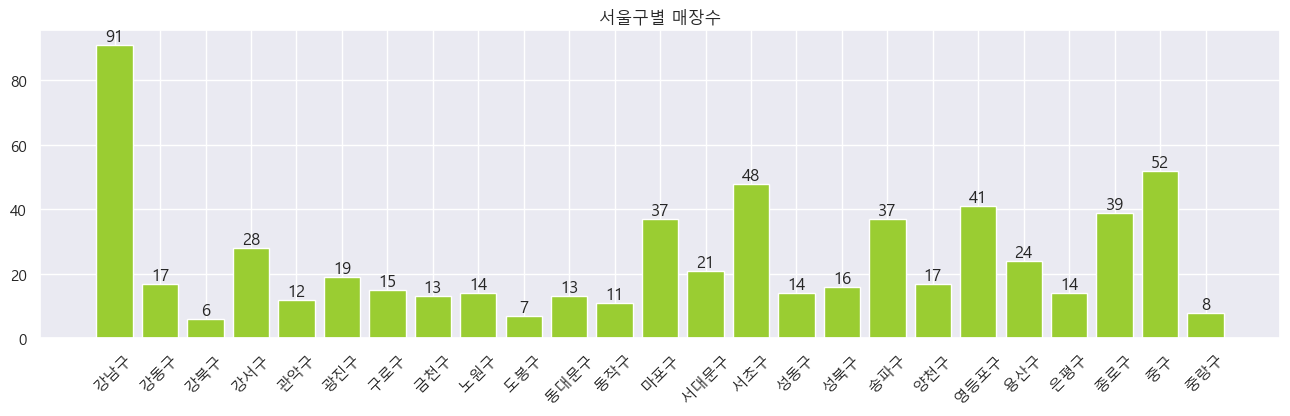

In [45]:
# 구별 매장정보를 차트화
plt.figure(figsize=(16, 4))
bar = plt.bar(df_seoul_starbuck_count.index, df_seoul_starbuck_count['매장수'], color='yellowgreen')
plt.title('서울구별 매장수')
plt.xticks(rotation=45)

for rect in bar: # 숫자 넣는 부분    
    # 바차트 각 값별 높이 == 데이터 크기
    value = rect.get_height()    
    plt.text(rect.get_x() + rect.get_width()/2.0, value, f'{value:d}', ha='center', va='bottom', size = 12) # 바차트 정중앙에 텍스트를 표시

plt.show()

#### 서울시 인구 및 사업체 정보
- 서울 열린 데이터 광장(https://data.seoul.go.kr/)
- 서울_구별인구정보, 서울_구별사업체정보.xlsx

In [75]:
## 서울 구별 인구데이터
df_seoul_population = pd.read_excel('./data/서울_구별인구정보.xlsx', header=0)
df_seoul_population.head()

,구,세대소계,성별소계,남자,여자,한국인소계,남자.1,여자.1,등록외국인소계,남자.2,여자.2,세대당인구,65세이상
0,소계,4469417,9638799,4649446,4989353,9386034,4540031,4846003,252765,109415,143350,2.10,1743696
1,종로구,72067,150453,71890,78563,139417,67306,72111,11036,4584,6452,1.93,28764
2,중구,64714,131793,63495,68298,121312,58659,62653,10481,4836,5645,1.87,25920
3,용산구,107825,227106,109826,117280,213151,102312,110839,13955,7514,6441,1.98,39747
4,성동구,133089,284766,137620,147146,277361,134519,142842,7405,3101,4304,2.08,49462


In [76]:
## 전체 소계만 삭제(drop) - 실행할때마다 0번 인데스가 날아갈 수 있기 때문에 한번 실행
df_seoul_population.drop(0, inplace=True)

In [77]:
df_seoul_population.head()

,구,세대소계,성별소계,남자,여자,한국인소계,남자.1,여자.1,등록외국인소계,남자.2,여자.2,세대당인구,65세이상
1,종로구,72067,150453,71890,78563,139417,67306,72111,11036,4584,6452,1.93,28764
2,중구,64714,131793,63495,68298,121312,58659,62653,10481,4836,5645,1.87,25920
3,용산구,107825,227106,109826,117280,213151,102312,110839,13955,7514,6441,1.98,39747
4,성동구,133089,284766,137620,147146,277361,134519,142842,7405,3101,4304,2.08,49462
5,광진구,170077,351180,167562,183618,335554,161277,174277,15626,6285,9341,1.97,56819


In [78]:
## 서울 구별 사업체 현황로드
df_seoul_business = pd.read_excel('./data/서울_구별사업체정보.xlsx')
df_seoul_business.head()

,구,소계,여성대표자,성별소계,남자,여자
0,소계,1188091,407948,5771226,3218529,2552697
1,종로구,48361,16563,275063,153210,121853
2,중구,70308,25794,386564,213782,172782
3,용산구,29680,10454,152605,84314,68291
4,성동구,41665,13447,203221,116978,86243


In [79]:
## 전체 소계만 삭제(drop) - 실행할때마다 0번 인데스가 날아갈 수 있기 때문에 한번 실행
df_seoul_business.drop(0, inplace=True)

In [80]:
df_seoul_business.head()

,구,소계,여성대표자,성별소계,남자,여자
1,종로구,48361,16563,275063,153210,121853
2,중구,70308,25794,386564,213782,172782
3,용산구,29680,10454,152605,84314,68291
4,성동구,41665,13447,203221,116978,86243
5,광진구,33706,12297,129707,71124,58583


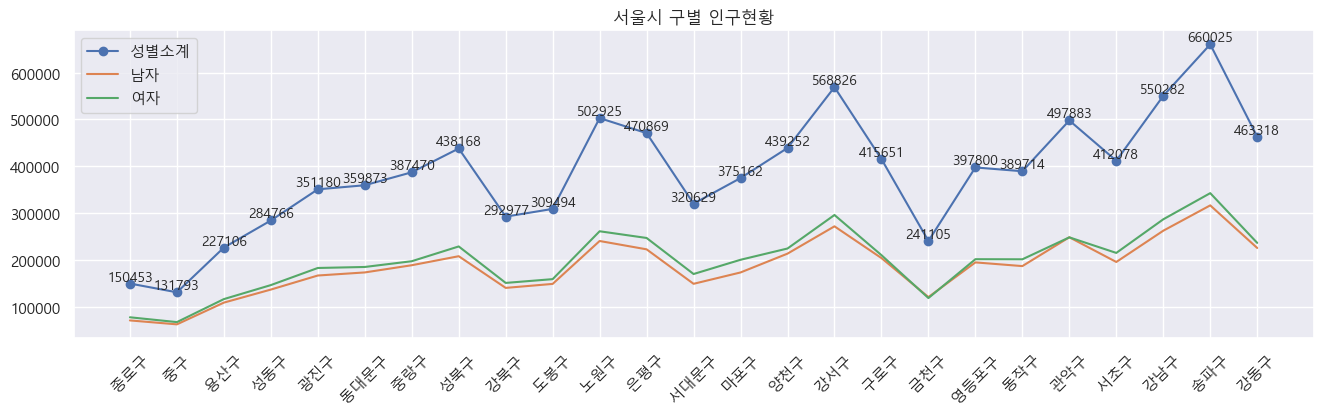

In [92]:
## 서울 시 구별 인구 시각화
## df_seoul_population['구'] - x축
## df_seoul_population['성별소계'] - y축
plt.figure(figsize=(16, 4))
x = df_seoul_population['구'].to_list()
y = df_seoul_population['성별소계'].to_list()
plt.plot(x, y, label='성별소계', marker='o') # marker : o, ^, s, *
plt.plot(df_seoul_population['구'], df_seoul_population['남자'], label='남자')
plt.plot(df_seoul_population['구'], df_seoul_population['여자'], label='여자')

plt.xticks(rotation=45)
plt.legend()
plt.title('서울시 구별 인구현황')

# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
for i in range(len(x)):
    value = y[i]
    plt.text(x[i], value + 0.5, f'{value:d}', ha='center', va='bottom', size = 10)

plt.show()

In [93]:
## 서울시 구별 인구에서 성별소계만 추출
df_seoul_population[['구', '성별소계']]

,구,성별소계
1,종로구,150453
2,중구,131793
3,용산구,227106
4,성동구,284766
5,광진구,351180
6,동대문구,359873
7,중랑구,387470
8,성북구,438168
9,강북구,292977
10,도봉구,309494


In [95]:
## 스타벅스 서울 구별 정보 합치기(merge)
## merge에는 inplace= 속성이 없음. 합친ㄴ값을 다른 변수에 할당!
df_seoul_muni_and_pop = pd.merge(left=df_seoul_municipality, right=df_seoul_population[['구', '성별소계']], how='left', on='구')

In [96]:
df_seoul_muni_and_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시       25 non-null     object 
 1   구       25 non-null     object 
 2   위도      25 non-null     float64
 3   경도      25 non-null     float64
 4   성별소계    25 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


In [97]:
df_seoul_muni_and_pop.head()

,시,구,위도,경도,성별소계
0,서울,강남구,37.514575,127.049556,550282
1,서울,강동구,37.527367,127.125864,463318
2,서울,강북구,37.636956,127.027719,292977
3,서울,강서구,37.548156,126.851675,568826
4,서울,관악구,37.475386,126.953844,497883


In [98]:
## inner 쓰지않고 left 쓰는 이유 : 빈 열을 지우지 않기 위해서
df_seoul_muni_and_pop_sbcount = pd.merge(left=df_seoul_muni_and_pop, right=df_seoul_starbuck_count, how='left', on='구')

In [99]:
df_seoul_muni_and_pop_sbcount.tail()

,시,구,위도,경도,성별소계,매장수
20,서울,용산구,37.536094,126.967522,227106,24
21,서울,은평구,37.599969,126.931242,470869,14
22,서울,종로구,37.570378,126.981642,150453,39
23,서울,중구,37.561003,126.999642,131793,52
24,서울,중랑구,37.603806,127.094778,387470,8


In [102]:
## 총 통계치
df_seoul_total = pd.merge(left=df_seoul_muni_and_pop_sbcount, right=df_seoul_business[['구', '소계', '성별소계']], how='left', on='구')

In [103]:
df_seoul_total.tail()

,시,구,위도,경도,성별소계_x,매장수,소계,성별소계_y
20,서울,용산구,37.536094,126.967522,227106,24,29680,152605
21,서울,은평구,37.599969,126.931242,470869,14,36509,109031
22,서울,종로구,37.570378,126.981642,150453,39,48361,275063
23,서울,중구,37.561003,126.999642,131793,52,70308,386564
24,서울,중랑구,37.603806,127.094778,387470,8,39310,113144


In [104]:
## 컬럼이름 변경
df_seoul_total.columns = ['시', '구', '위도', '경도', '인구수', '매장수', '사업체수', '사업체종사자수']

In [105]:
df_seoul_total.tail()

,시,구,위도,경도,인구수,매장수,사업체수,사업체종사자수
20,서울,용산구,37.536094,126.967522,227106,24,29680,152605
21,서울,은평구,37.599969,126.931242,470869,14,36509,109031
22,서울,종로구,37.570378,126.981642,150453,39,48361,275063
23,서울,중구,37.561003,126.999642,131793,52,70308,386564
24,서울,중랑구,37.603806,127.094778,387470,8,39310,113144


In [106]:
## 최종 DF csv 저장
df_seoul_total.to_csv('./data/서울구별_인구및사업체현황.csv')

### 스타벅스 입지 분석, 지도 시각화

In [107]:
!pip install folium


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
!pip show folium

Name: folium
Version: 0.15.1
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: C:\DEV\Langs\Python311\Lib\site-packages
Requires: branca, jinja2, numpy, requests, xyzservices
Required-by: 


In [118]:
## 지도 표시
import folium
seoul_center = [37.550800, 126.989857]
seoul_map = folium.Map(location=seoul_center, zoom_start=14)

## 각 매장별 위치, 지도에 마커로 표시
for idx in df_seoul_starbuck.index:
    lat = df_seoul_starbuck.loc[idx, '위도'] # 위도 DF.loc[행, 열]
    lng = df_seoul_starbuck.loc[idx, '경도'] # 경도 DF.loc[행, 열]
    # 마커표시
    popup_text = f'<strong style="font-size:13px; color:blue">{df_seoul_starbuck.loc[idx, "매장명"]}</strong><br/>{df_seoul_starbuck.loc[idx, "주소"]}'
    popup = folium.Popup(popup_text, max_width=500)
    folium.Marker(location=[lat, lng], color='green', popup=popup).add_to(seoul_map)

seoul_map

In [120]:
## 매장타입, 갯수를 뽑을때 pivot처럼 영구적으로 사용할 것이 아니면, value_
df_seoul_starbuck['매장종류']

0      general
1      general
2      general
3      general
4      general
        ...   
609    general
610    general
611    general
612    general
613    general
Name: 매장종류, Length: 614, dtype: object

In [ ]:
## 매장종류별 시각화
seoul_center = [37.550800, 126.989857]
seoul_map = folium.Map(location=seoul_center, zoom_start=14)